# Cleaning

### Dataset: Train.csv

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('./datasets/train.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## First thing we will do is clean the column title names

In [78]:
df.columns = [col.replace(" ", "_").lower() for col in df.columns]
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Next, we will examine the data set and start cleaning and noting things of interest

In [79]:
df.shape

(2051, 81)

## Max number of features we will want is approx ~sqrt 2051 = 45 rows

In [80]:
df.corr().abs()[['saleprice']].sort_values('saleprice').iloc[-13:-1] # Abs value of correlations associated with saleprice, only correlations over .5

,saleprice
totrms_abvgrd,0.504014
mas_vnr_area,0.512230
garage_yr_blt,0.533922
full_bath,0.537969
year_remod/add,0.550370
year_built,0.571849
1st_flr_sf,0.618486
total_bsmt_sf,0.628925
garage_cars,0.648220
garage_area,0.650270


## ^Top 12 Most correlated variables with Sale Price

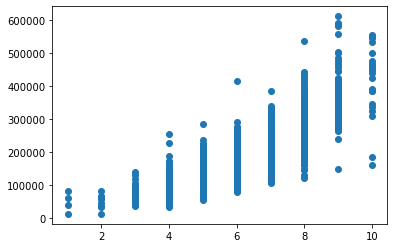

In [81]:
plt.scatter(df['overall_qual'], df['saleprice']); # Highest correlated characteristic

In [82]:
nulls = df.isnull().sum()
nulls[nulls > 0]
#Inspiration https://datascience.stackexchange.com/questions/15924/how-can-i-fill-nan-values-in-a-pandas-dataframe-in-python

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

mas_vnr_area

garage_yr_blt

total_bsmt_sf

garage_cars

garage_area

## following columns match with best 12 predictors and have NaN that will need to be filled in with something (mean?)

In [83]:
df[['mas_vnr_area', 'garage_yr_blt', 'total_bsmt_sf', 'garage_cars', 'garage_area']].isnull().sum().sum()

139

In [84]:
df[['mas_vnr_area', 'garage_yr_blt', 'total_bsmt_sf', 'garage_cars', 'garage_area']].isnull().sum()

mas_vnr_area      22
garage_yr_blt    114
total_bsmt_sf      1
garage_cars        1
garage_area        1
dtype: int64

### ^Nulls above need to be replaced, 139 total

In [85]:
fix1 = round(df['mas_vnr_area'].mean())

In [86]:
df['mas_vnr_area'] = df['mas_vnr_area'].fillna(fix1)

In [87]:
df['mas_vnr_area'].isnull().sum()

0

In [88]:
df['garage_yr_blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: garage_yr_blt, dtype: float64

In [89]:
# fix the max of 2207 to be equal to actual year built: 2007

In [90]:
df['garage_yr_blt'].isnull().sum()

114

In [91]:
#fix2 = round(df['garage_yr_blt'].mean()) # 1979, did not end up using

In [92]:
# If house is new though, we want it to be current year

In [93]:
df['garage_yr_blt'] = df['garage_yr_blt'].fillna(df['year_built'])

In [94]:
df['garage_yr_blt'].isnull().sum()

0

In [95]:
def yr_fix(garage_cell):
    if garage_cell == 2207:
        return 2007
    else:
        return garage_cell

df['garage_yr_blt'] = df['garage_yr_blt'].map(yr_fix)

In [96]:
df['garage_yr_blt'].describe() # typo outlier gone now

count    2051.000000
mean     1976.610434
std        26.615416
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2002.000000
max      2010.000000
Name: garage_yr_blt, dtype: float64

In [97]:
# df[(df[pd.isnull(df['garage_yr_blt'])])&(df[df['sale_type'].str.contains('New')])] work on this later?

In [98]:
df['total_bsmt_sf'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

In [99]:
df['total_bsmt_sf'].isnull().sum()

1

In [100]:
fix3 = round(df['total_bsmt_sf'].mean())

In [101]:
df['total_bsmt_sf'] = df['total_bsmt_sf'].fillna(fix3)

In [102]:
df['total_bsmt_sf'].isnull().sum()

0

In [103]:
df['garage_cars'].describe()

count    2050.000000
mean        1.776585
std         0.764537
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: garage_cars, dtype: float64

In [104]:
df['garage_cars'].isnull().sum()

1

In [105]:
fix4 = round(df['garage_cars'].mean())

In [106]:
df['garage_cars'] = df['garage_cars'].fillna(fix4)

In [107]:
df['garage_cars'].isnull().sum()

0

In [108]:
df['garage_area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

In [109]:
df['garage_area'].isnull().sum()

1

In [110]:
fix5 = round(df['garage_area'].mean())

In [111]:
df['garage_area'] = df['garage_area'].fillna(fix5)

In [112]:
df['garage_area'].isnull().sum()

0

# All null values on columns of interest gone/fixed now, will need to do same process for test sheet, should put all code into single function to run at once

In [113]:
df[['mas_vnr_area', 'garage_yr_blt', 'total_bsmt_sf', 'garage_cars', 'garage_area']].isnull().sum()

mas_vnr_area     0
garage_yr_blt    0
total_bsmt_sf    0
garage_cars      0
garage_area      0
dtype: int64

In [114]:
df.corr().abs()[['saleprice']].sort_values('saleprice').iloc[-13:-1] # values slightly updated from change, but nothing bad

,saleprice
totrms_abvgrd,0.504014
mas_vnr_area,0.508615
full_bath,0.537969
year_remod/add,0.550370
garage_yr_blt,0.556146
year_built,0.571849
1st_flr_sf,0.618486
total_bsmt_sf,0.628668
garage_cars,0.648128
garage_area,0.650246


# Investigating Columns to be dummified, will most likely pick categorical data on things that already have high correlations

In [115]:
df['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [116]:
df['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [117]:
df['land_contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: land_contour, dtype: int64

In [118]:
df['lot_config'].value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [119]:
df['utilities'].value_counts() # Won't dummify since almost all same

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [120]:
df['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

In [121]:
df['condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [122]:
df['condition_2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

In [123]:
df['bldg_type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

In [124]:
df['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

In [125]:
df['roof_style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

In [126]:
df['foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

In [127]:
df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [128]:
df.groupby(df['bsmt_qual'])[['saleprice']].mean()

,saleprice
bsmt_qual,
Ex,329506.619565
Fa,107752.166667
Gd,202537.582176
Po,89000.000000
TA,139988.461105


In [129]:
df['bsmt_qual'].unique() # nan values would need to be replaced

array(['TA', 'Gd', 'Fa', nan, 'Ex', 'Po'], dtype=object)

In [130]:
df['heating'].value_counts() # Won't dummify since almost all same

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

# Not Dummifying anything yet, just keeping these as reference

In [133]:
df.shape

(2051, 81)

In [132]:
df.to_csv('./datasets/train_1st_clean.csv')